In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,302 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129502 files and di

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install haversine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import numpy as np

warnings.filterwarnings(action='ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**장애 등급별/동별 현황 데이터 전처리**

In [ ]:
df_status = pd.read_csv('/content/drive/MyDrive/FARM_PROJECT/data/장애인+현황(등급별_동별)_20221122214140.csv', encoding='UTF8')

In [ ]:
df_status = df_status.drop([0, 1, 2, 3])
df_status = df_status.drop('동별(1)', axis=1)
df_status = df_status.transpose()
df_status = df_status.rename(columns=df_status.iloc[0])
df_status = df_status.drop(df_status.index[0])
df_status = df_status.rename({'2021':'총 합계', '2021.1':'남자 총 합계', '2021.2':'여자 총 합계',
                              '2021.3':'심한 장애 합계', '2021.4':'남자 심한 장애', '2021.5':'여자 심한 장애',
                              '2021.6':'심하지 않은 장애 합계', '2021.7':'남자 심하지 않은 장애', '2021.8':'여자 심하지 않은 장애'}, axis=0)
df_status.head(9)

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
총 합계,5929,5634,7686,11284,12253,15518,20357,17382,17395,15300,...,28546,18374,11458,14495,14417,20211,10291,15182,20356,18614
남자 총 합계,3426,3262,4445,6515,7087,9007,11792,9940,9922,8843,...,16551,10938,6916,8662,8266,11865,6057,8772,12074,11158
여자 총 합계,2503,2372,3241,4769,5166,6511,8565,7442,7473,6457,...,11995,7436,4542,5833,6151,8346,4234,6410,8282,7456
심한 장애 합계,2206,1968,2757,3853,4338,5337,7526,6036,6479,5555,...,12050,6578,4075,4893,5201,7385,4074,6795,7767,7125
남자 심한 장애,1317,1186,1640,2342,2580,3265,4496,3576,3808,3320,...,7177,3975,2492,3055,3080,4440,2444,4016,4816,4426
여자 심한 장애,889,782,1117,1511,1758,2072,3030,2460,2671,2235,...,4873,2603,1583,1838,2121,2945,1630,2779,2951,2699
심하지 않은 장애 합계,3723,3666,4929,7431,7915,10181,12831,11346,10916,9745,...,16496,11796,7383,9602,9216,12826,6217,8387,12589,11489
남자 심하지 않은 장애,2109,2076,2805,4173,4507,5742,7296,6364,6114,5523,...,9374,6963,4424,5607,5186,7425,3613,4756,7258,6732
여자 심하지 않은 장애,1614,1590,2124,3258,3408,4439,5535,4982,4802,4222,...,7122,4833,2959,3995,4030,5401,2604,3631,5331,47


In [ ]:
df_status = df_status.drop(['남자 총 합계', '여자 총 합계', '남자 심한 장애', '여자 심한 장애', '남자 심하지 않은 장애', '여자 심하지 않은 장애'])
df_status = df_status.rename({'총 합계':'total', '심한 장애 합계':'severe disability', '심하지 않은 장애 합계':'mild disability'})
df_status.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
total,5929,5634,7686,11284,12253,15518,20357,17382,17395,15300,...,28546,18374,11458,14495,14417,20211,10291,15182,20356,18614
severe disability,2206,1968,2757,3853,4338,5337,7526,6036,6479,5555,...,12050,6578,4075,4893,5201,7385,4074,6795,7767,7125
mild disability,3723,3666,4929,7431,7915,10181,12831,11346,10916,9745,...,16496,11796,7383,9602,9216,12826,6217,8387,12589,11489


**장애인스포츠강좌이용권시설정보 데이터 전처리**

In [ ]:
df_fac = pd.read_csv('/content/drive/MyDrive/FARM_PROJECT/data/장애인스포츠강좌이용권시설정보_202205.csv', encoding='UTF8')
df_fac = df_fac.drop({'CTPRVN_CD','SIGNGU_CD','RPRSNTV_TEL_NO','COURSE_ITEM_NM','COURSE_NM'},axis = 1)
df_fac = df_fac.rename({'CTPRVN_NM': '시/도', 'SIGNGU_NM':'시/군/구', 'FCLTY_NM':'시설명',
                        'ZIP_NO':'우편번호', 'FCLTY_ADDR':'시설주소', 'FCLTY_DETAIL_ADDR':'시설상세주소',
                        'MAIN_ITEM_CD':'주요종목코드','MAIN_ITEM_NM':'주요종목명','FCLTY_CRDNT_LO':'시설좌표경도',
                        'FCLTY_CRDNT_LA':'시설좌표위도','COURSE_FLAG_CD':'강좌구분코드'}, axis=1)
df_fac.head()

,시/도,시/군/구,시설명,우편번호,시설주소,시설상세주소,주요종목코드,주요종목명,시설좌표경도,시설좌표위도,강좌구분코드
0,서울,구로구,고척체육센터,8275,서울특별시 구로구 경인로 430,고척체육센터(고척동),12,수영,126.867172,37.498289,장애인강좌
1,서울,강동구,상일유도스쿨,5284,서울특별시 강동구 상암로 425,2층(상일동),17,유도,127.169820,37.545828,장애인강좌
2,서울,도봉구,창동문화체육센터,1412,서울특별시 도봉구 노해로69길 132,창동문화체육센터(창동),25,헬스,127.050706,37.658118,장애인강좌
3,서울,서대문구,삼성골드스포츠클럽,3686,서울특별시 서대문구 증가로 191,"삼성골드스포츠클럽(남가좌동, DMC래미안클라시스)",12,수영,126.916662,37.578247,장애인강좌
4,서울,중랑구,천마유도체육관,2237,서울특별시 중랑구 면목로39길 23,지층(면목동),17,유도,127.086068,37.579810,장애인강좌


In [ ]:
df_fac = df_fac.loc[df_fac['시/도'] == '서울']
df_fac = df_fac.reset_index(drop=True)
df_fac = df_fac.drop({'우편번호', '시설주소', '시설상세주소', '주요종목코드','주요종목명', '강좌구분코드'}, axis=1)
df_fac

,시/도,시/군/구,시설명,시설좌표경도,시설좌표위도
0,서울,구로구,고척체육센터,126.867172,37.498289
1,서울,강동구,상일유도스쿨,127.169820,37.545828
2,서울,도봉구,창동문화체육센터,127.050706,37.658118
3,서울,서대문구,삼성골드스포츠클럽,126.916662,37.578247
4,서울,중랑구,천마유도체육관,127.086068,37.579810
...,...,...,...,...,...
262,서울,동작구,아우어리,126.921055,37.498077
263,서울,강북구,스트라이크존 미아사거리구장,127.030809,37.613178
264,서울,서대문구,서대문복싱클럽,126.961860,37.570339
265,서울,종로구,max 스포츠,126.960422,37.605439


In [ ]:
fac_count = df_fac['시/군/구'].value_counts().to_frame()
fac_count = fac_count.transpose()
fac_count = fac_count.rename({'시/군/구':'facility'})
fac_count = fac_count.transpose()
fac_count

,facility
서대문구,25
동작구,22
종로구,20
노원구,17
강동구,15
강북구,14
금천구,13
마포구,12
강서구,12
중랑구,11


In [ ]:
df_price = pd.read_csv('/content/drive/MyDrive/FARM_PROJECT/data/공시지가_2022년.csv', encoding='cp949')
df_price

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
0,서울특별시,성북구,하월곡동,1129013600100901694,4837000,11290,13600,1,토지,90,1694,2022,2022-01-01
1,서울특별시,성북구,하월곡동,1129013600100810112,5544000,11290,13600,1,토지,81,112,2022,2022-01-01
2,서울특별시,성북구,하월곡동,1129013600100810214,3605000,11290,13600,1,토지,81,214,2022,2022-01-01
3,서울특별시,성북구,하월곡동,1129013600100810125,3136000,11290,13600,1,토지,81,125,2022,2022-01-01
4,서울특별시,성북구,하월곡동,1129013600100901476,3245000,11290,13600,1,토지,90,1476,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903773,서울특별시,성북구,종암동,1129013500100660016,3765000,11290,13500,1,토지,66,16,2022,2022-01-01
903774,서울특별시,성북구,종암동,1129013500100280266,3485000,11290,13500,1,토지,28,266,2022,2022-01-01
903775,서울특별시,성북구,종암동,1129013500100290012,6850000,11290,13500,1,토지,29,12,2022,2022-01-01
903776,서울특별시,성북구,종암동,1129013500100790317,4125000,11290,13500,1,토지,79,317,2022,2022-01-01


In [ ]:
df_gangseo = df_price.loc[df_price['시군구명'] == '강서구']
df_gangseo

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
255698,서울특별시,강서구,염창동,1150010100100980000,3790000,11500,10100,1,토지,98,0,2022,2022-01-01
255699,서울특별시,강서구,염창동,1150010100100970063,3600000,11500,10100,1,토지,97,63,2022,2022-01-01
255700,서울특별시,강서구,염창동,1150010100100970050,3748000,11500,10100,1,토지,97,50,2022,2022-01-01
255701,서울특별시,강서구,염창동,1150010100100970042,3790000,11500,10100,1,토지,97,42,2022,2022-01-01
255702,서울특별시,강서구,염창동,1150010100100970033,3827000,11500,10100,1,토지,97,33,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298713,서울특별시,강서구,오쇠동,1150011300101780001,634000,11500,11300,1,토지,178,1,2022,2022-01-01
298714,서울특별시,강서구,오쇠동,1150011300101780000,69100,11500,11300,1,토지,178,0,2022,2022-01-01
298715,서울특별시,강서구,오쇠동,1150011300101800003,60300,11500,11300,1,토지,180,3,2022,2022-01-01
298716,서울특별시,강서구,오쇠동,1150011300101800001,60300,11500,11300,1,토지,180,1,2022,2022-01-01


In [ ]:
df_yongsan = df_price.loc[df_price['시군구명'] == '용산구']
df_yongsan

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월
687332,서울특별시,용산구,후암동,1117010100101640032,6288000,11170,10100,1,토지,164,32,2022,2022-01-01
687333,서울특별시,용산구,후암동,1117010100100270014,11910000,11170,10100,1,토지,27,14,2022,2022-01-01
687334,서울특별시,용산구,후암동,1117010100100270013,11570000,11170,10100,1,토지,27,13,2022,2022-01-01
687335,서울특별시,용산구,후암동,1117010100102490011,3613000,11170,10100,1,토지,249,11,2022,2022-01-01
687336,서울특별시,용산구,후암동,1117010100100270002,5534000,11170,10100,1,토지,27,2,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730207,서울특별시,용산구,보광동,1117013600101320016,11780000,11170,13600,1,토지,132,16,2022,2022-01-01
730208,서울특별시,용산구,보광동,1117013600101320015,10010000,11170,13600,1,토지,132,15,2022,2022-01-01
730209,서울특별시,용산구,보광동,1117013600102090034,8370000,11170,13600,1,토지,209,34,2022,2022-01-01
730210,서울특별시,용산구,보광동,1117013600103540000,7595000,11170,13600,1,토지,354,0,2022,2022-01-01


In [ ]:
df_compare = pd.read_csv('/content/drive/MyDrive/FARM_PROJECT/data/소상공인시장진흥공단_상가(상권)정보_서울_202206.csv', encoding='UTF8')
df_compare

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346224,18466695,신내역시티부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1126010500103150000000004,NaN,서울특별시 중랑구 봉화산로59길 25,131800,2057.0,NaN,NaN,NaN,127.103704,37.611201
346225,18455989,석정칼국수,NaN,Q,음식,Q04,분식,Q04A02,국수/만두/칼국수,I56194,...,1126010100102260010031461,NaN,서울특별시 중랑구 면목로 446,131817,2160.0,NaN,1,NaN,127.086895,37.591754
346226,18454507,서울왕도숯불갈비,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1123010300104380010033192,NaN,서울특별시 동대문구 약령시로 122-3,130862,2573.0,NaN,NaN,NaN,127.043357,37.582867
346227,18447435,칠교,NaN,F,생활서비스,F13,기타서비스업,F13A01,사업경영상담,M71531,...,1154510100106870000000003,대륭21차,서울특별시 금천구 범안로 1126,153803,8595.0,NaN,NaN,NaN,126.887062,37.465200


In [ ]:
df_compare.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df_compare = df_compare[['시도명', '시군구명', '행정동명', '법정동명', '위도', '경도']]
df_compare = df_compare.loc[(df_compare['시군구명'] == '강서구') | (df_compare['시군구명'] == '용산구')]
df_compare = df_compare.reset_index(drop=True)
df_compare

,시도명,시군구명,행정동명,법정동명,위도,경도
0,서울특별시,용산구,이촌2동,이촌동,37.525295,126.955577
1,서울특별시,용산구,한강로동,한강로3가,37.533351,126.960850
2,서울특별시,강서구,발산1동,마곡동,37.558471,126.834314
3,서울특별시,용산구,한남동,한남동,37.534878,127.008408
4,서울특별시,강서구,우장산동,화곡동,37.544630,126.837789
...,...,...,...,...,...,...
28199,서울특별시,용산구,원효로2동,산천동,37.533851,126.950049
28200,서울특별시,용산구,한강로동,한강로1가,37.532224,126.973108
28201,서울특별시,용산구,이태원2동,이태원동,37.540344,126.993150
28202,서울특별시,강서구,가양1동,마곡동,37.567882,126.827443


In [ ]:
from haversine import haversine
dsg_list = [[0 for col in range(2)] for row in range(17182)]
point_A = [37.5625151858945, 126.81077476153]
point_B = [37.5791664441084, 126.798072277888]
df_dsg = df_compare.loc[df_compare['시군구명'] == '강서구']
df_dsg['distance_A'] = 0
df_dsg['distance_B'] = 0
for i in range(0, 17182):
  dsg_list[i][0] = df_dsg['위도'].iloc[i] 
  dsg_list[i][1] = df_dsg['경도'].iloc[i]
  df_dsg['distance_A'].iloc[i] = haversine(point_A, dsg_list[i], unit='km')
  df_dsg['distance_B'].iloc[i] = haversine(point_B, dsg_list[i], unit='km')
df_dsg = df_dsg.reset_index(drop=True)
df_dsg

,시도명,시군구명,행정동명,법정동명,위도,경도,distance_A,distance_B
0,서울특별시,강서구,발산1동,마곡동,37.558471,126.834314,2.123041,3.936789
1,서울특별시,강서구,우장산동,화곡동,37.544630,126.837789,3.102604,5.196465
2,서울특별시,강서구,화곡4동,화곡동,37.532126,126.860227,5.515958,7.574906
3,서울특별시,강서구,방화1동,방화동,37.574007,126.810967,1.277893,1.272967
4,서울특별시,강서구,화곡6동,화곡동,37.551971,126.850407,3.685027,5.515615
...,...,...,...,...,...,...,...,...
17177,서울특별시,강서구,염창동,염창동,37.555076,126.868784,5.179846,6.783647
17178,서울특별시,강서구,가양1동,마곡동,37.560822,126.829603,1.670233,3.447238
17179,서울특별시,강서구,가양1동,마곡동,37.559341,126.834810,2.147760,3.917067
17180,서울특별시,강서구,가양1동,마곡동,37.567882,126.827443,1.585761,2.876572


In [ ]:
dsy_list = [[0 for col in range(2)] for row in range(11022)]
point_C = [37.543577354664, 126.97174741814]
point_D = [37.534726279146, 126.990244593595]
df_dsy = df_compare.loc[df_compare['시군구명'] == '용산구']
df_dsy['distance_C'] = 0
df_dsy['distance_D'] = 0
for i in range(0, 11022):
  dsy_list[i][0] = df_dsy['위도'].iloc[i] 
  dsy_list[i][1] = df_dsy['경도'].iloc[i]
  df_dsy['distance_C'].iloc[i] = haversine(point_C, dsy_list[i], unit='km')
  df_dsy['distance_D'].iloc[i] = haversine(point_D, dsy_list[i], unit='km')
df_dsy = df_dsy.reset_index(drop=True)
df_dsy
df_dsy

,시도명,시군구명,행정동명,법정동명,위도,경도,distance_C,distance_D
0,서울특별시,용산구,이촌2동,이촌동,37.525295,126.955577,2.483126,3.231933
1,서울특별시,용산구,한강로동,한강로3가,37.533351,126.960850,1.488651,2.596393
2,서울특별시,용산구,한남동,한남동,37.534878,127.008408,3.374027,1.601655
3,서울특별시,용산구,원효로2동,원효로3가,37.533880,126.957471,1.657434,2.891367
4,서울특별시,용산구,효창동,효창동,37.540471,126.961985,0.927464,2.572293
...,...,...,...,...,...,...,...,...
11017,서울특별시,용산구,이태원2동,이태원동,37.541577,126.992998,1.886709,0.799528
11018,서울특별시,용산구,이촌2동,이촌동,37.517657,126.958025,3.125882,3.416925
11019,서울특별시,용산구,원효로2동,산천동,37.533851,126.950049,2.197711,3.545618
11020,서울특별시,용산구,한강로동,한강로1가,37.532224,126.973108,1.268096,1.536445


In [ ]:
count_A = 0
count_B = 0
count_C = 0
count_D = 0
for i in range(0, 17182):
  if df_dsg['distance_A'].iloc[i] <= 1:
    count_A += 1
  if df_dsg['distance_B'].iloc[i] <= 1:
    count_B += 1

for i in range(0, 11022):  
  if df_dsy['distance_C'].iloc[i] <= 1:
    count_C += 1
  if df_dsy['distance_D'].iloc[i] <= 1:
    count_D += 1
print(count_A, count_B, count_C, count_D)

1509 350 2251 2497


In [ ]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [ ]:
df_point = pd.DataFrame()
df_point['위치'] = ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D']
df_point['value'] = 0
df_point['시군구명'] = 0
df_point['법정동명'] = 0
df_point['value'].iloc[0] = df_gangseo.loc[df_gangseo['법정동명'] == '공항동']['공시지가(원/㎡)'].mean()
df_point['value'].iloc[1] = df_gangseo.loc[df_gangseo['법정동명'] == '개화동']['공시지가(원/㎡)'].mean()
df_point['value'].iloc[2] = df_yongsan.loc[df_yongsan['법정동명'] == '갈월동']['공시지가(원/㎡)'].mean()
df_point['value'].iloc[3] = df_yongsan.loc[df_yongsan['법정동명'] == '이태원동']['공시지가(원/㎡)'].mean()
df_point['value'].iloc[4] = count_A
df_point['value'].iloc[5] = count_B
df_point['value'].iloc[6] = count_C
df_point['value'].iloc[7] = count_D
df_point['value'].iloc[8] = 31050
df_point['value'].iloc[9] = 23402
df_point['value'].iloc[10] = 7540
df_point['value'].iloc[11] = 7935
df_point['value'].iloc[12] = 1315
df_point['value'].iloc[13] = 1605
df_point['value'].iloc[14] = 517
df_point['value'].iloc[15] = 231
df_point['시군구명'].iloc[0] = '강서구'
df_point['시군구명'].iloc[1] = '강서구'
df_point['시군구명'].iloc[2] = '용산구'
df_point['시군구명'].iloc[3] = '용산구'
df_point['시군구명'].iloc[4] = '강서구'
df_point['시군구명'].iloc[5] = '강서구'
df_point['시군구명'].iloc[6] = '용산구'
df_point['시군구명'].iloc[7] = '용산구'
df_point['시군구명'].iloc[8] = '강서구'
df_point['시군구명'].iloc[9] = '강서구'
df_point['시군구명'].iloc[10] = '용산구'
df_point['시군구명'].iloc[11] = '용산구'
df_point['시군구명'].iloc[12] = '강서구'
df_point['시군구명'].iloc[13] = '강서구'
df_point['시군구명'].iloc[14] = '용산구'
df_point['시군구명'].iloc[15] = '용산구'
df_point['법정동명'].iloc[0] = '공항동'
df_point['법정동명'].iloc[4] = '공항동'
df_point['법정동명'].iloc[8] = '공항동'
df_point['법정동명'].iloc[12] = '공항동'
df_point['법정동명'].iloc[1] = '개화동'
df_point['법정동명'].iloc[5] = '개화동'
df_point['법정동명'].iloc[9] = '개화동'
df_point['법정동명'].iloc[13] = '개화동'
df_point['법정동명'].iloc[2] = '갈월동'
df_point['법정동명'].iloc[6] = '갈월동'
df_point['법정동명'].iloc[10] = '갈월동'
df_point['법정동명'].iloc[14] = '갈월동'
df_point['법정동명'].iloc[3] = '이태원동'
df_point['법정동명'].iloc[7] = '이태원동'
df_point['법정동명'].iloc[11] = '이태원동'
df_point['법정동명'].iloc[15] = '이태원동'
df_point['분류'] = 0
df_point['분류'].iloc[0] = '공시지가'
df_point['분류'].iloc[1] = '공시지가'
df_point['분류'].iloc[2] = '공시지가'
df_point['분류'].iloc[3] = '공시지가'
df_point['분류'].iloc[4] = '편의시설 수'
df_point['분류'].iloc[5] = '편의시설 수'
df_point['분류'].iloc[6] = '편의시설 수'
df_point['분류'].iloc[7] = '편의시설 수'
df_point['분류'].iloc[8] = '생활인구 수'
df_point['분류'].iloc[9] = '생활인구 수'
df_point['분류'].iloc[10] = '생활인구 수'
df_point['분류'].iloc[11] = '생활인구 수'
df_point['분류'].iloc[12] = '거주 장애인 수'
df_point['분류'].iloc[13] = '거주 장애인 수'
df_point['분류'].iloc[14] = '거주 장애인 수'
df_point['분류'].iloc[15] = '거주 장애인 수'
lst_1 = [df_point['value'].iloc[0], df_point['value'].iloc[1], df_point['value'].iloc[2], df_point['value'].iloc[3]]
lst_2 = [df_point['value'].iloc[4], df_point['value'].iloc[5], df_point['value'].iloc[6], df_point['value'].iloc[7]]
lst_3 = [df_point['value'].iloc[8], df_point['value'].iloc[9], df_point['value'].iloc[10], df_point['value'].iloc[11]]
lst_4 = [df_point['value'].iloc[12], df_point['value'].iloc[13], df_point['value'].iloc[14], df_point['value'].iloc[15]]
for i in range(0, 4):
  df_point['value'].iloc[i] = z_score_normalize(lst_1)[i]
  df_point['value'].iloc[i] = df_point['value'].iloc[i] + 2
for i in range(4, 8):
  df_point['value'].iloc[i] = z_score_normalize(lst_2)[i - 4]
  df_point['value'].iloc[i] = df_point['value'].iloc[i] + 2
for i in range(8, 12):
  df_point['value'].iloc[i] = z_score_normalize(lst_3)[i - 8]
  df_point['value'].iloc[i] = df_point['value'].iloc[i] + 2
for i in range(12, 16):
  df_point['value'].iloc[i] = z_score_normalize(lst_4)[i - 12]
  df_point['value'].iloc[i] = df_point['value'].iloc[i] + 2
df_point_G = pd.DataFrame()
df_point_Y = pd.DataFrame()
df_point_G = df_point.loc[df_point['시군구명'] == '강서구']
df_point_Y = df_point.loc[df_point['시군구명'] == '용산구']
df_point

,위치,value,시군구명,법정동명,분류
0,A,1.429588,강서구,공항동,공시지가
1,B,0.648488,강서구,개화동,공시지가
2,C,2.984972,용산구,갈월동,공시지가
3,D,2.936951,용산구,이태원동,공시지가
4,A,1.829029,강서구,공항동,편의시설 수
5,B,0.440900,강서구,개화동,편의시설 수
6,C,2.717719,용산구,갈월동,편의시설 수
7,D,3.012352,용산구,이태원동,편의시설 수
8,A,3.341608,강서구,공항동,생활인구 수
9,B,2.585385,강서구,개화동,생활인구 수


**시각화**

In [ ]:
df_map = pd.DataFrame()
df_map['name'] = df_status.columns
for i in range(0, 25):
  df_map.loc[i, 'value'] = df_status.loc['total'].iloc[i]
  df_map.loc[i, 'value2'] = df_status.loc['severe disability'].iloc[i]

for i in range(0, 25):
  for j in range(0, 25):
    if df_map['name'].iloc[i] == fac_count.index[j]:
      df_map.loc[i, 'value3'] = fac_count['facility'].iloc[j]

df_map['value'] = df_map['value'].astype(int)
df_map['value2'] = df_map['value2'].astype(int)
df_map['value3'] = df_map['value3'].astype(int)
df_map['value4'] = df_map['value'] / df_map['value3']
df_map = df_map.sort_values('value', ascending=False)
df_map = df_map.reset_index(drop=True)
df_map

,name,value,value2,value3,value4
0,강서구,28546,12050,12,2378.833333
1,노원구,26904,11856,17,1582.588235
2,은평구,21756,8327,9,2417.333333
3,중랑구,20357,7526,11,1850.636364
4,송파구,20356,7767,8,2544.500000
5,관악구,20211,7385,5,4042.200000
6,강동구,18614,7125,15,1240.933333
7,구로구,18374,6578,9,2041.555556
8,양천구,17525,6327,8,2190.625000
9,강북구,17395,6479,14,1242.500000


In [ ]:
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
vworld_key = '36E6246B-C326-383F-B087-F347733E93E6'
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

f = folium.Figure(width=960, height = 640)

m = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=11,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
).add_to(f)

layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.Choropleth(
    geo_data = geo_json,
    name='choropleth',
    data=df_map,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.5,
).add_to(m)


m

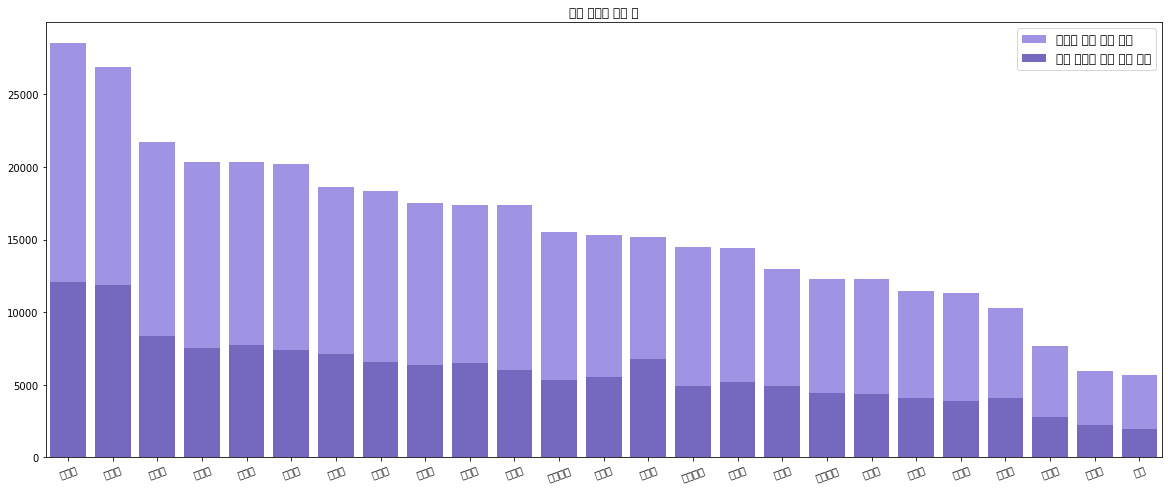

In [ ]:
x = df_map['name']
y = df_map['value']
y2 = df_map['value2']

plt.figure(figsize = (20, 8))
sns.barplot(x, y, alpha=0.8, color='mediumslateblue', label='장애를 앓고 있는 사람')
sns.barplot(x, y2, color='slateblue', label='중증 장애를 앓고 있는 사람') 

plt.title('구별 장애인 환자 수')
plt.legend(fontsize=12)
plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')

plt.show()

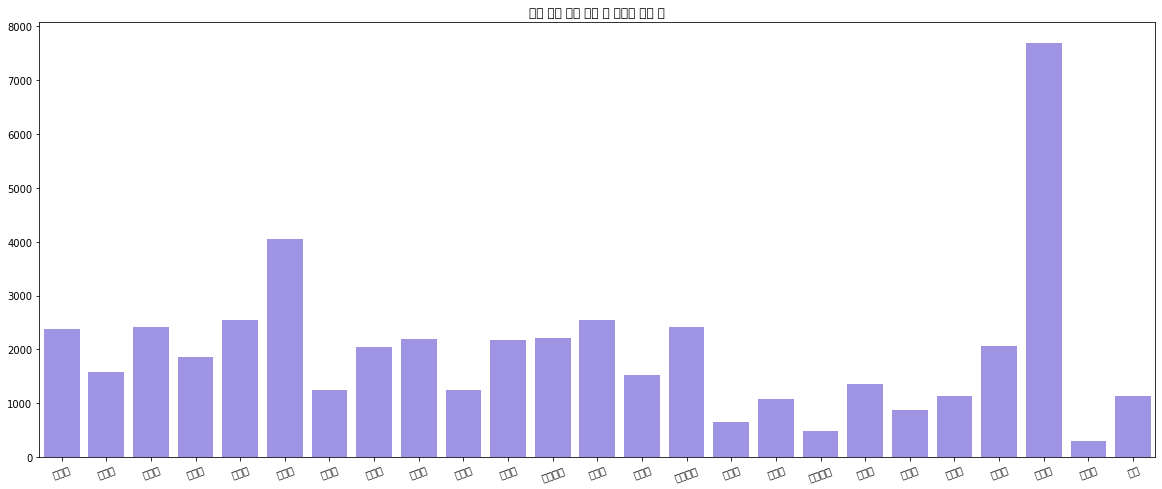

In [ ]:
y3 = df_map['value4']
plt.figure(figsize = (20, 8))

sns.barplot(x, y3, alpha=0.8, color='mediumslateblue')
plt.title('구별 체육 시설 하나 당 장애인 환자 수')
plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')

plt.show()

In [ ]:
import json
jpath = '/content/drive/MyDrive/FARM_PROJECT/data/gangseo.json'
seoul_geo = json.load(open(jpath, encoding='cp949'))

f = folium.Figure(width=960, height = 640)

m = folium.Map(
    location=[37.563116862072, 126.82403305549],
    zoom_start=13,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
).add_to(f)

layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data=df_gangseo,
    columns=['법정동명', '공시지가(원/㎡)'],
    key_on='feature.properties.emd_kor_nm',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=1,
).add_to(m)

folium.CircleMarker([37.577054550318, 126.81261120612],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.572378371174, 126.80619839261],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.5791664441084, 126.798072277888],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.561758498811, 126.80078951131],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.56357495929, 126.81048196058],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.567676376855, 126.81659749616],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.561455412499, 126.81106756248],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.566800174592, 126.82752320109],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.560120594315, 126.8257473073],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.568697428285, 126.84081249573],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.558997507594, 126.83732207804],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.549123285363, 126.83646188887],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.541494514251, 126.84040179518],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.532496055509, 126.84643138731],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.561507749155, 126.85436941381],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.557748907498, 126.86130182991],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.551134227645, 126.86506941461],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.547005388868, 126.8750276063],
                    color='tomato',
                    radius = 20).add_to(m)
m

In [ ]:
import json
jpath = '/content/drive/MyDrive/FARM_PROJECT/data/yongsan.json'
seoul_geo = json.load(open(jpath, encoding='cp949'))

f = folium.Figure(width=960, height = 640)

m = folium.Map(
    location=[37.53496756809, 126.97728233669],
    zoom_start=13,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
).add_to(f)

layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data=df_yongsan,
    columns=['법정동명', '공시지가(원/㎡)'],
    key_on='feature.properties.emd_kor_nm',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=1,
).add_to(m)

folium.CircleMarker([37.554837713553, 126.97181200824],
                    color='tomato',
                    radius = 20).add_to(m)
folium.CircleMarker([37.545499859161, 126.97216591319],
                    color='tomato',
                    radius = 20).add_to(m)                 
folium.CircleMarker([37.541654850167, 126.97132892309],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.539562584121, 126.96118000168],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.534392570188, 126.97332641651],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.529676495044, 126.96844970582],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.529128500148, 126.9654885873],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.522663846366, 126.97338947269],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.520008410936, 126.99008546866],
                    color='tomato',
                    radius = 20).add_to(m)                   
folium.CircleMarker([37.534964139699, 126.98687580933],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.534488418593, 126.99361337786],
                    color='tomato',
                    radius = 20).add_to(m)                    
folium.CircleMarker([37.540222602536, 127.00169040799],
                    color='tomato',
                    radius = 20).add_to(m)                   
folium.CircleMarker([37.529220372863, 127.00805810754],
                    color='tomato',
                    radius = 20).add_to(m)
m

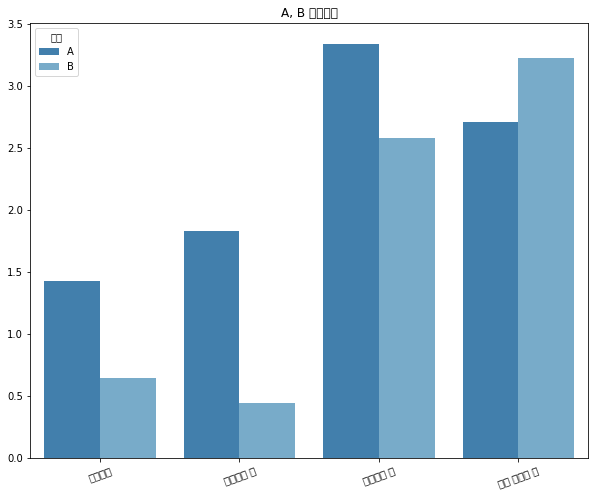

In [ ]:
plt.figure(figsize = (10, 8))

sns.barplot(x='분류', y='value', hue='위치', data=df_point_G, palette='tab20c')
plt.title('A, B 지역정보')
plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')

plt.show()

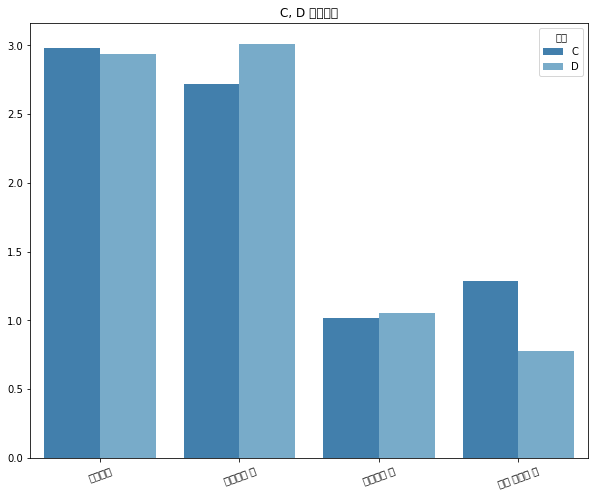

In [ ]:
plt.figure(figsize = (10, 8))

sns.barplot(x='분류', y='value', hue='위치', data=df_point_Y, palette='tab20c')
plt.title('C, D 지역정보')
plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')

plt.show()

In [ ]:
jpath = '/content/drive/MyDrive/FARM_PROJECT/data/gangseo.json'
seoul_geo = json.load(open(jpath, encoding='cp949'))

f = folium.Figure(width=960, height = 640)

m = folium.Map(
    location=[37.563116862072, 126.82403305549],
    zoom_start=13,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
).add_to(f)

layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data=df_gangseo,
    columns=['법정동명', '공시지가(원/㎡)'],
    key_on='feature.properties.emd_kor_nm',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=1,
).add_to(m)

folium.CircleMarker([37.5791664441084, 126.798072277888],
                    color='tomato',
                    radius = 20).add_to(m)

folium.Marker([37.5791664441084, 126.798072277888],
              icon=folium.Icon(color='red', icon='flag')).add_to(m)
m

In [ ]:

jpath = '/content/drive/MyDrive/FARM_PROJECT/data/yongsan.json'
seoul_geo = json.load(open(jpath, encoding='cp949'))

f = folium.Figure(width=960, height = 640)

m = folium.Map(
    location=[37.53496756809, 126.97728233669],
    zoom_start=13,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False
).add_to(f)

layer = "gray"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    name='choropleth',
    data=df_yongsan,
    columns=['법정동명', '공시지가(원/㎡)'],
    key_on='feature.properties.emd_kor_nm',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=1,
).add_to(m)

folium.CircleMarker([37.543577354664, 126.97174741814],
                    color='tomato',
                    radius = 20).add_to(m)

folium.Marker([37.543577354664, 126.97174741814],
              icon=folium.Icon(color='red', icon='flag')).add_to(m)

m